<a href="https://colab.research.google.com/github/Abhiram12331/ML-Project/blob/main/MLFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Missing Values:  0
Duplicate Entries:  0
Column Name: N
No. of unique values: 137

Column Name: P
No. of unique values: 117

Column Name: K
No. of unique values: 73

Column Name: TEMPERATURE
No. of unique values: 2200

Column Name: HUMIDITY
No. of unique values: 2200

Column Name: PH
No. of unique values: 2200

Column Name: RAINFALL
No. of unique values: 2200

Column Name: CROP
No. of unique values: 22

Uni

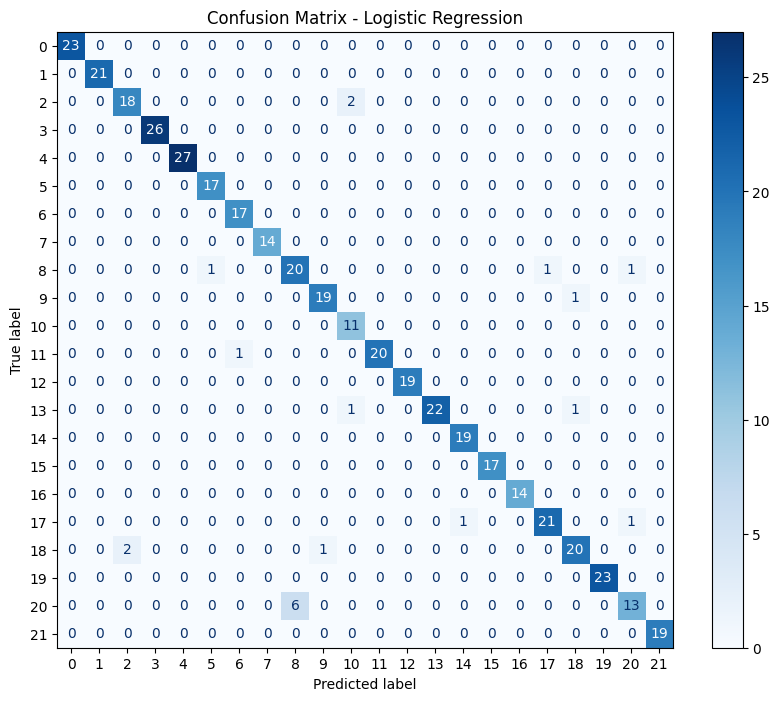

Naive Bayes with accuracy: 0.9886363636363636


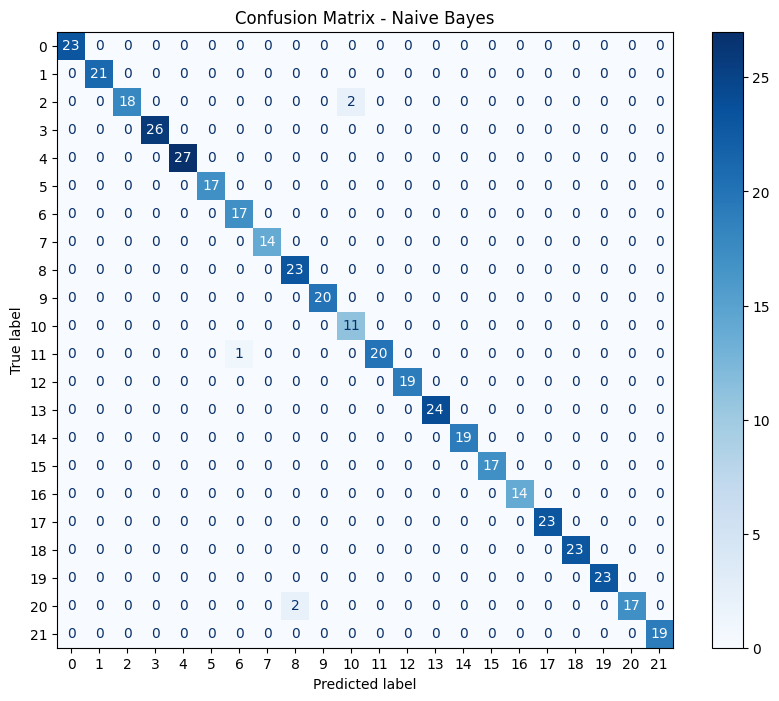

K-Nearest Neighbors with accuracy: 0.9431818181818182


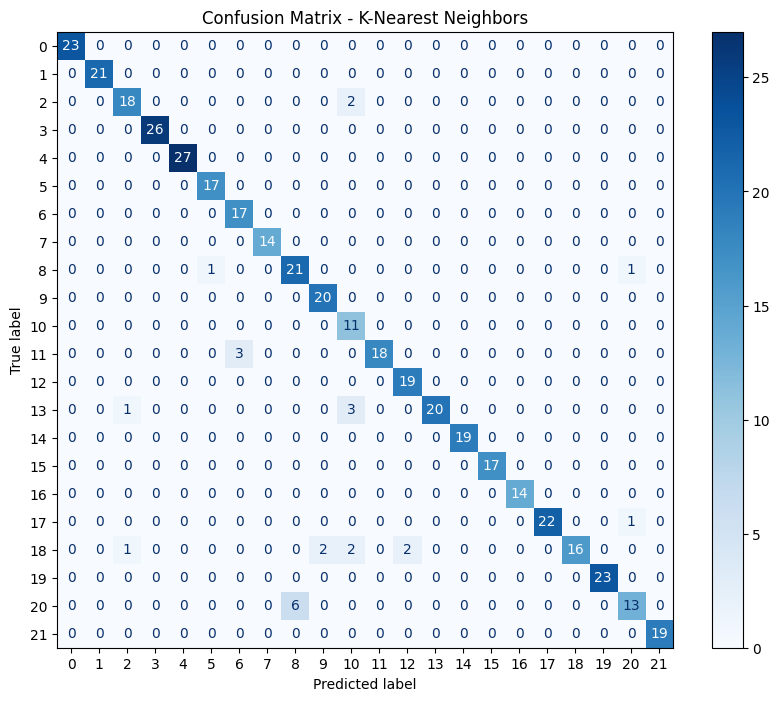

Random Forest with accuracy: 0.9818181818181818


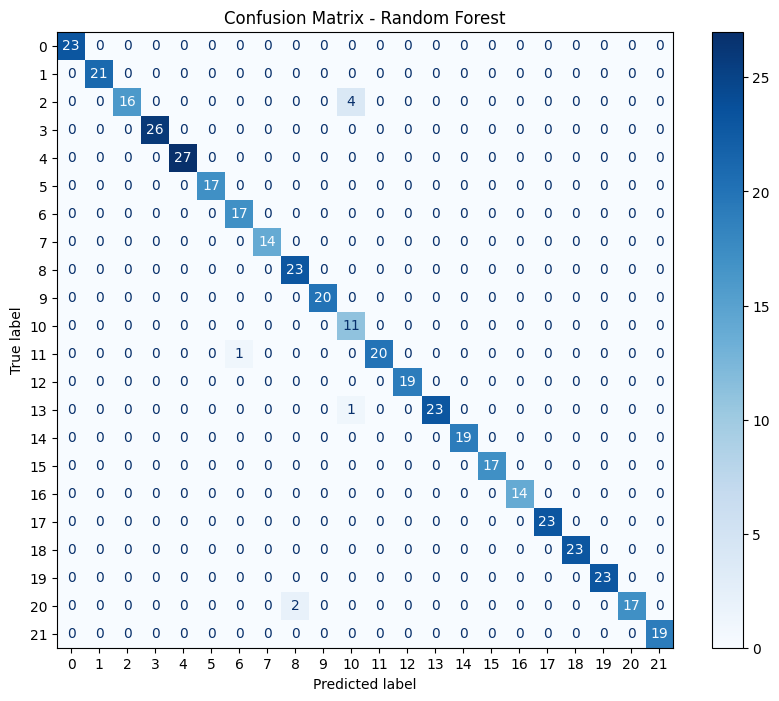

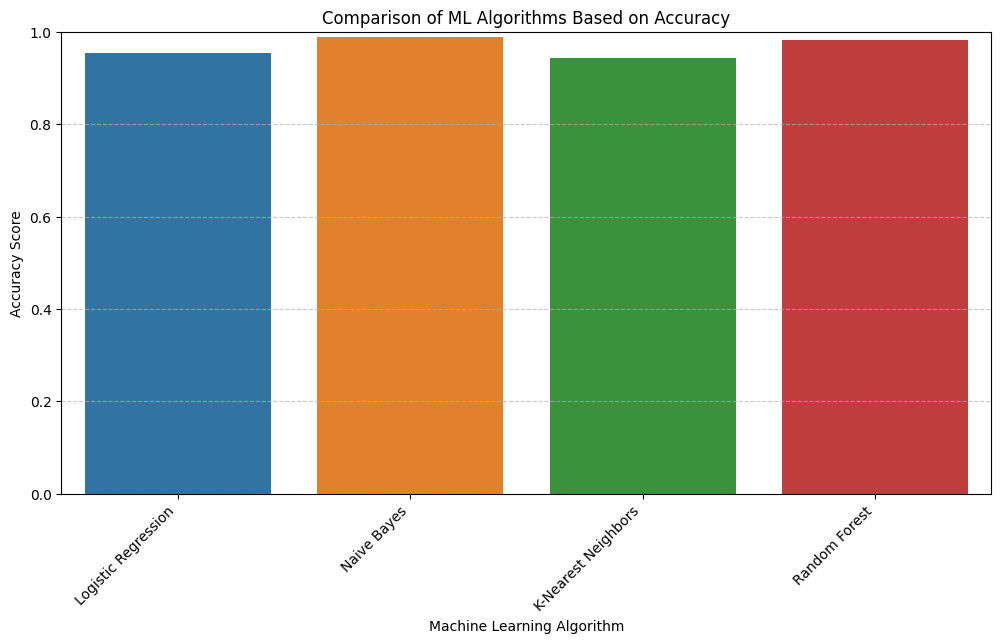


✅ Final Model Accuracy (Random Forest): 0.9818

📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      o

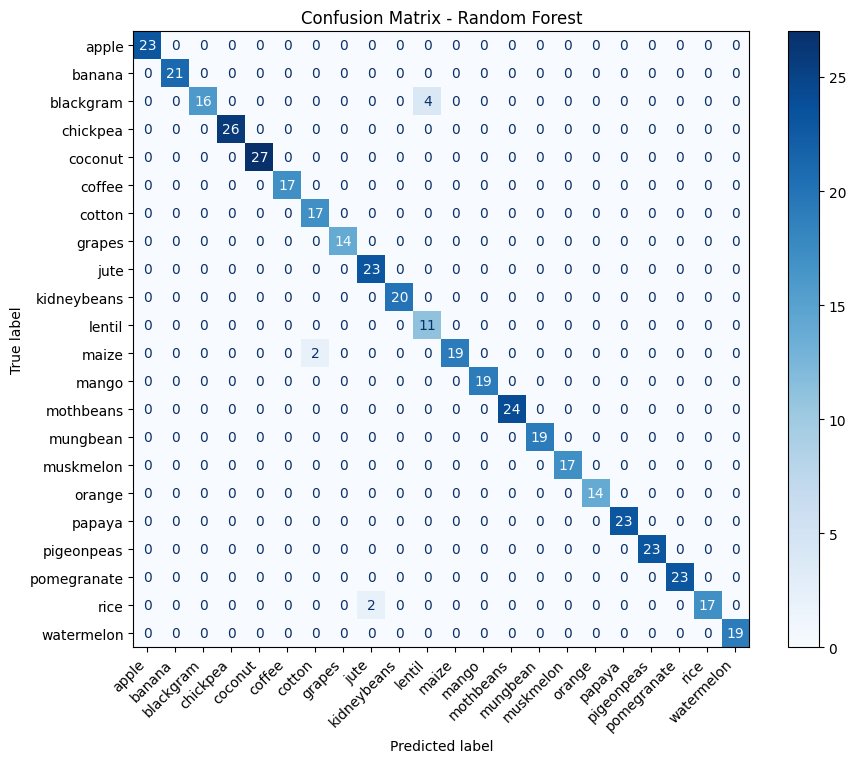


🌱 Enter the following values for crop recommendation 🌱

Nitrogen (N): 92
Phosphorus (P): 95
Potassium (K): 92
Temperature (°C): 35
Humidity (%): 85
pH Level: 7
Rainfall (mm): 100

✅ Recommended Crop: **banana** 🌾
✅ Model saved at: /content/crop_recommendation_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Companion crops for rice: ['pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


In [ ]:
# Importing Libraries and Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing dataset
crop = pd.read_csv('/content/Crop_recommendation.csv')

# Data Pre-Processing
crop.info()
crop.shape
crop.head()
crop.describe()
crop.columns

# Renamed column 'label' as 'crop'
crop.rename(columns = {'label':'crop'}, inplace = True)
crop

# Checking missing values of the dataset in each column
crop.isnull().sum()

crop.duplicated().sum()

# Check for missing and duplicate values
print("Missing Values: ", crop.isnull().sum().sum())
print("Duplicate Entries: ", crop.duplicated().sum())

# Checking for unique values
for i in crop.columns:
    print("Column Name:", i.upper())
    print("No. of unique values: {}\n".format(crop[i].nunique()))
    # Checking if the column is categorical (object type)
    if crop[i].dtype == 'object':
        print('Unique values:', pd.unique(crop[i]))

crop['crop'].value_counts()

# Encode categorical target variable
label_encoder = LabelEncoder()
crop['crop_encoded'] = label_encoder.fit_transform(crop['crop'])
y_encoded = crop['crop_encoded']

# Create mapping of label names and encoded values
classes = pd.DataFrame({'label': label_encoder.classes_, 'encoded': range(len(label_encoder.classes_))})
classes.set_index('label', inplace=True)
print(classes)

# Splitting data into features and target variable
x = crop.drop(columns=['crop','crop_encoded'])
y_encoded

# Splitting data set - 25% test dataset and 75%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

# Scale Features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Comparing Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# Create instances of all models (Replace SVM and Decision Tree with Logistic Regression)
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Store accuracy results
accuracy_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy  # Store accuracy
    print(f"{name} with accuracy: {accuracy}")
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("=" * 50)

# Create accuracy comparison DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar chart with proper hue setting
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, hue='Algorithm', dodge=False, legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Algorithm")
plt.title("Comparison of ML Algorithms Based on Accuracy")

# Set accuracy limits
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Random Forest has the highest accuracy, so we choose it as the final model
from sklearn.metrics import classification_report

# Train Final Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Print Final Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Model Accuracy (Random Forest): {accuracy:.4f}")

# Print Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Final Model
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, ax=ax, cmap=plt.cm.Blues, display_labels=label_encoder.classes_)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Predicting System
import numpy as np
import pandas as pd

# Function to take user input and predict crop using the trained model
def recommend_crop():
    print("\n🌱 Enter the following values for crop recommendation 🌱\n")

    try:
        # Take user input
        N = float(input("Nitrogen (N): "))
        P = float(input("Phosphorus (P): "))
        K = float(input("Potassium (K): "))
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        ph = float(input("pH Level: "))
        rainfall = float(input("Rainfall (mm): "))

        # Create an array from user input
        user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Convert user input to DataFrame with correct column names
        user_input_df = pd.DataFrame(user_input, columns=x.columns)

        # Scale input using the trained StandardScaler
        user_input_scaled = scaler.transform(user_input_df)

        # Predict crop using the existing trained model (rf_model)
        predicted_label = rf_model.predict(user_input_scaled)
        crop = label_encoder.inverse_transform(predicted_label)[0]

        print(f"\n✅ Recommended Crop: **{crop}** 🌾")

    except ValueError:
        print("\n❌ Invalid input! Please enter numerical values only.")

# Call the function to test (uncomment below to run in an interactive environment)
recommend_crop()

# Saving as pickle
import pickle
# Save the trained model
with open('/content/crop_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
print("✅ Model saved at: /content/crop_recommendation_model.pkl")

from google.colab import files
files.download('/content/crop_recommendation_model.pkl')

import pickle

# Save the trained scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the scaler file
from google.colab import files
files.download('scaler.pkl')

# Clustering (Optional part for companion crops)
data = crop
from sklearn.cluster import KMeans

# Prepare Data for Clustering
companion_data = data.drop(['crop'], axis=1)
crop_labels = data['crop']

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust clusters based on dataset
kmeans.fit(companion_data)

# Assign cluster labels
data['cluster'] = kmeans.labels_

# Function to recommend companion crops
def recommend_companion(crop_name):
    cluster_id = data[data['crop'] == crop_name]['cluster'].values[0]
    companion_crops = data[data['cluster'] == cluster_id]['crop'].unique()
    companions = [crop for crop in companion_crops if crop != crop_name]
    return companions

# Example Usage
crop_to_check = 'rice'
print(f"Companion crops for {crop_to_check}: {recommend_companion(crop_to_check)}")


**1. Importing Libraries and Dataset**

In [ ]:
# Importing Libraries and Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




In [ ]:
# Importing dataset
crop = pd.read_csv('/content/Crop_recommendation.csv')

**2. Data Pre-Processing**


In [ ]:
# Data Pre-Processing
crop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.shape


(2200, 8)

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# Renamed column 'label' as 'crop'
crop.rename(columns = {'label':'crop'}, inplace = True)
crop

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# Checking missing values of the dataset in each column
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
crop,0


In [ ]:
crop.duplicated().sum()

0

In [ ]:
# Check for missing and duplicate values
print("Missing Values: ", crop.isnull().sum().sum())
print("Duplicate Entries: ", crop.duplicated().sum())


Missing Values:  0
Duplicate Entries:  0


In [ ]:
# Checking for unique values
for i in crop.columns:
    print("Column Name:", i.upper())
    print("No. of unique values: {}\n".format(crop[i].nunique()))
    # Checking if the column is categorical (object type)
    if crop[i].dtype == 'object':
        print('Unique values:', pd.unique(crop[i]))

Column Name: N
No. of unique values: 137

Column Name: P
No. of unique values: 117

Column Name: K
No. of unique values: 73

Column Name: TEMPERATURE
No. of unique values: 2200

Column Name: HUMIDITY
No. of unique values: 2200

Column Name: PH
No. of unique values: 2200

Column Name: RAINFALL
No. of unique values: 2200

Column Name: CROP
No. of unique values: 22

Unique values: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
crop['crop'].value_counts()

,count
crop,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
# Encode categorical target variable
label_encoder = LabelEncoder()
crop['crop_encoded'] = label_encoder.fit_transform(crop['crop'])
y_encoded = crop['crop_encoded']


In [ ]:
# Create mapping of label names and encoded values
classes = pd.DataFrame({'label': label_encoder.classes_, 'encoded': range(len(label_encoder.classes_))})
classes.set_index('label', inplace=True)
print(classes)

             encoded
label               
apple              0
banana             1
blackgram          2
chickpea           3
coconut            4
coffee             5
cotton             6
grapes             7
jute               8
kidneybeans        9
lentil            10
maize             11
mango             12
mothbeans         13
mungbean          14
muskmelon         15
orange            16
papaya            17
pigeonpeas        18
pomegranate       19
rice              20
watermelon        21


In [ ]:
# Splitting data into features and target variable
x = crop.drop(columns=['crop','crop_encoded'])
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:

y_encoded

,crop_encoded
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
# Splitting data set - 25% test dataset and 75%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


x_train : (1760, 7)
x_test : (440, 7)
y_train : (1760,)
y_test : (440,)


In [ ]:
# Scale Features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Logistic Regression with accuracy: 0.9545454545454546


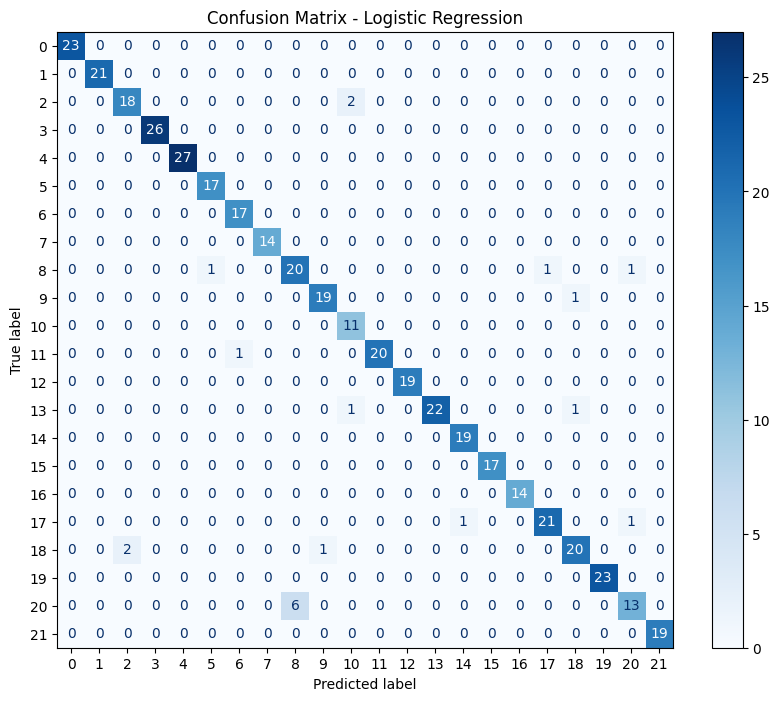

Naive Bayes with accuracy: 0.9886363636363636


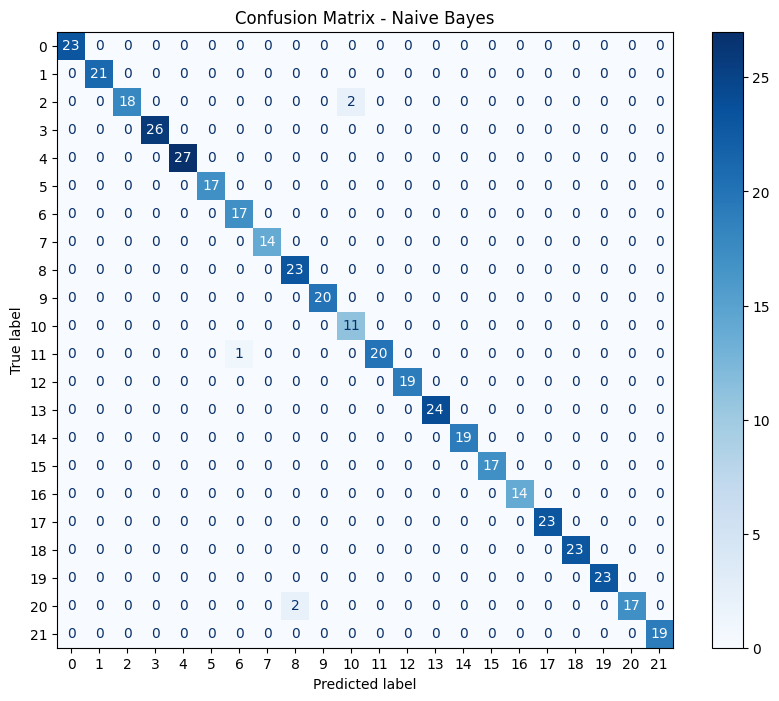

K-Nearest Neighbors with accuracy: 0.9431818181818182


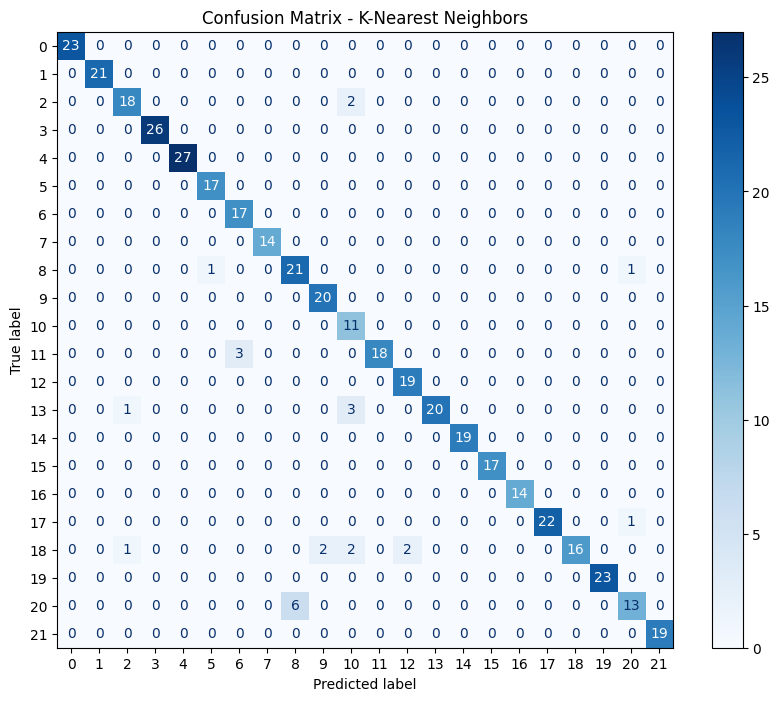

Random Forest with accuracy: 0.9795454545454545


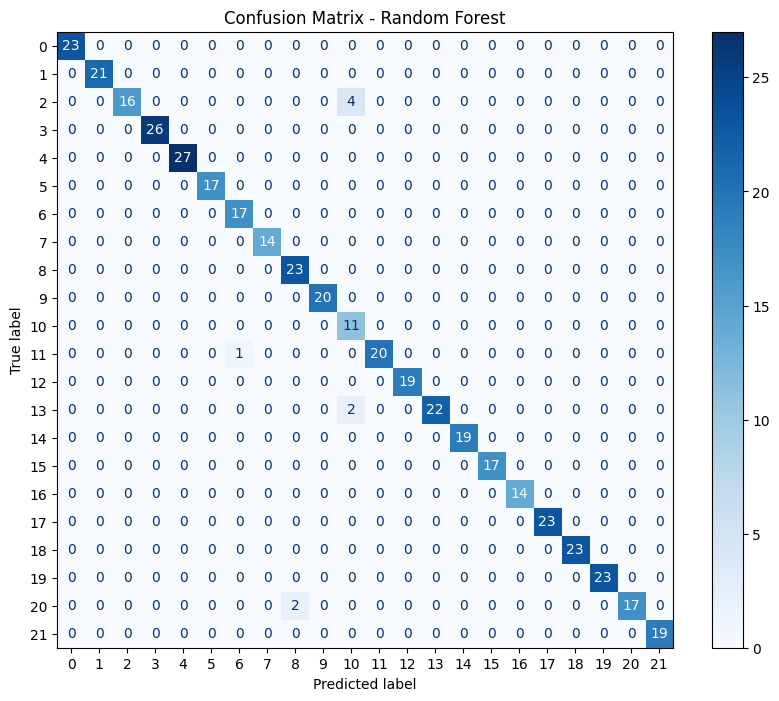

In [ ]:
# Comparing Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# Create instances of all models (Replace SVM and Decision Tree with Logistic Regression)
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Store accuracy results
accuracy_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy  # Store accuracy
    print(f"{name} with accuracy: {accuracy}")
    cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("=" * 50)


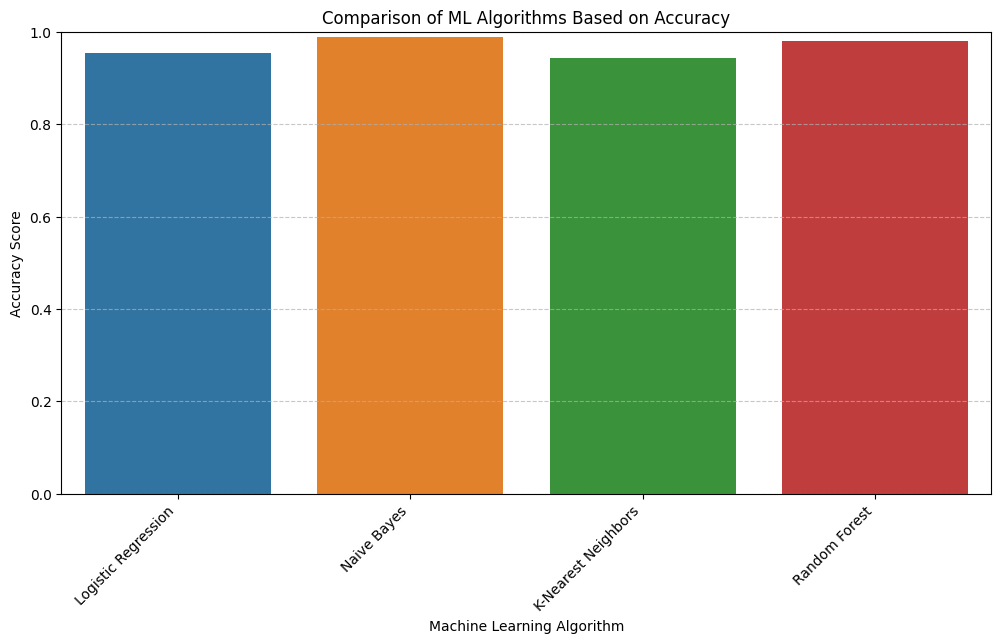

In [ ]:
# Create accuracy comparison DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar chart with proper hue setting
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, hue='Algorithm', dodge=False, legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Algorithm")
plt.title("Comparison of ML Algorithms Based on Accuracy")

# Set accuracy limits
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



✅ Final Model Accuracy (Naive Bayes): 0.9886

📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.90      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      ora

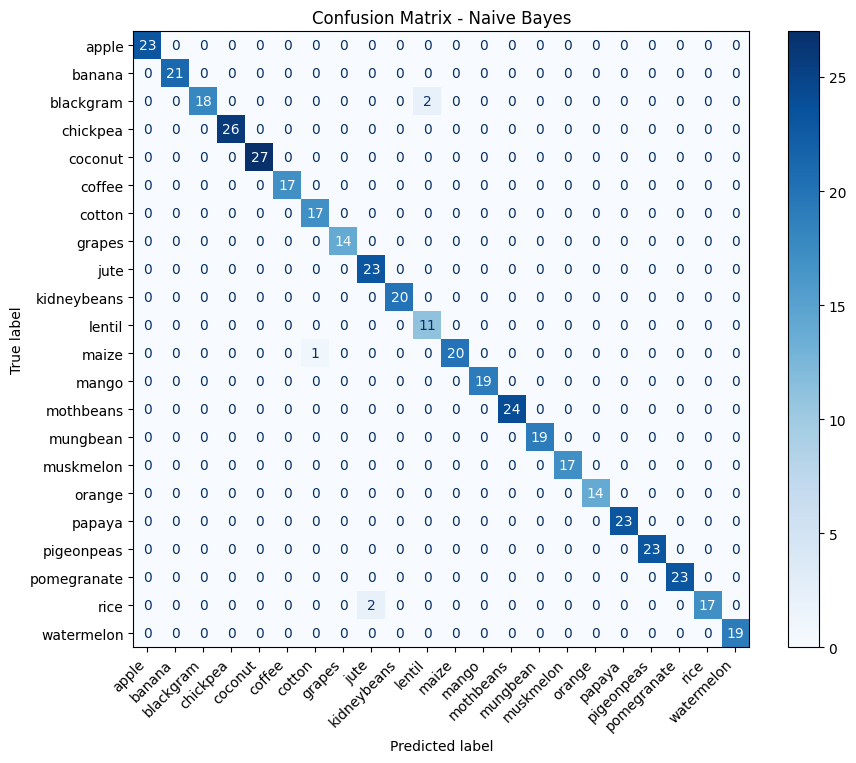

In [ ]:
# Naive Bayes has the highest accuracy, so we choose it as the final model
from sklearn.metrics import classification_report

# Train Final Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

# Print Final Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Model Accuracy (Naive Bayes): {accuracy:.4f}")

# Print Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Final Model
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(nb_model, x_test, y_test, ax=ax, cmap=plt.cm.Blues, display_labels=label_encoder.classes_)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [ ]:
# Predicting System
import numpy as np
import pandas as pd

# Function to take user input and predict crop using the trained model
def recommend_crop():
    print("\n🌱 Enter the following values for crop recommendation 🌱\n")

    try:
        # Take user input
        N = float(input("Nitrogen (N): "))
        P = float(input("Phosphorus (P): "))
        K = float(input("Potassium (K): "))
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        ph = float(input("pH Level: "))
        rainfall = float(input("Rainfall (mm): "))

        # Create an array from user input
        user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Convert user input to DataFrame with correct column names
        user_input_df = pd.DataFrame(user_input, columns=x.columns)

        # Scale input using the trained StandardScaler
        user_input_scaled = scaler.transform(user_input_df)

        # Predict crop using the existing trained model (nb_model)
        predicted_label = nb_model.predict(user_input_scaled)
        crop = label_encoder.inverse_transform(predicted_label)[0]

        print(f"\n✅ Recommended Crop: **{crop}** 🌾")

    except ValueError:
        print("\n❌ Invalid input! Please enter numerical values only.")

# Call the function to test (uncomment below to run in an interactive environment)
recommend_crop()



🌱 Enter the following values for crop recommendation 🌱

Nitrogen (N): 92
Phosphorus (P): 95
Potassium (K): 92
Temperature (°C): 35
Humidity (%): 85
pH Level: 7
Rainfall (mm): 100


NameError: name 'nb_model' is not defined

In [ ]:
# Saving as pickle
import pickle
# Save the trained model
with open('/content/crop_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)
print("✅ Model saved at: /content/crop_recommendation_model.pkl")

from google.colab import files
files.download('/content/crop_recommendation_model.pkl')

# Save the trained scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the scaler file
from google.colab import files
files.download('scaler.pkl')


✅ Model saved at: /content/crop_recommendation_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Clustering (Optional part for companion crops)
data = crop
from sklearn.cluster import KMeans

# Prepare Data for Clustering
companion_data = data.drop(['crop'], axis=1)
crop_labels = data['crop']

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust clusters based on dataset
kmeans.fit(companion_data)

# Assign cluster labels
data['cluster'] = kmeans.labels_

# Function to recommend companion crops
def recommend_companion(crop_name):
    cluster_id = data[data['crop'] == crop_name]['cluster'].values[0]
    companion_crops = data[data['cluster'] == cluster_id]['crop'].unique()
    companions = [crop for crop in companion_crops if crop != crop_name]
    return companions

# Example Usage
crop_to_check = 'rice'
print(f"Companion crops for {crop_to_check}: {recommend_companion(crop_to_check)}")


Companion crops for rice: ['pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the crop dataset
crop_data = pd.read_csv('Crop_recommendation.csv')  # Update with your file path

# Print first few rows of the dataset to confirm
print(crop_data.head())

# Rename the 'label' column to 'crop' for consistency
crop_data.rename(columns={'label': 'crop'}, inplace=True)

# Check column names to verify
print(crop_data.columns)  # Should now contain 'crop' instead of 'label'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the 'crop' column (target variable)
crop_data['crop_encoded'] = label_encoder.fit_transform(crop_data['crop'])

# Save the label encoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')

# Print confirmation message
print("✅ label_encoder.pkl saved successfully!")


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')
✅ label_encoder.pkl saved successfully!


In [ ]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, 'crop_recommendation_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')



['/content/label_encoder.pkl']

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle
from google.colab import files

# Step 1: Upload your dataset to Colab
uploaded = files.upload()

# After uploading, the dataset will be available in '/content/'
# Replace 'crop_data.csv' with the actual name of your uploaded file if necessary
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Step 2: Load the dataset
df = pd.read_csv(file_name)  # Load the uploaded CSV file

# Step 3: Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()

# Assuming your target column is named 'label', where the crop names are stored
label_encoder.fit(df['label'])  # Fit the LabelEncoder to the 'label' column

# Step 4: Save the LabelEncoder to a file
label_encoder_path = '/content/label_encoder.pkl'  # Path to save the LabelEncoder
with open(label_encoder_path, 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

print(f"LabelEncoder saved successfully at: {label_encoder_path}")

# Step 5: Download the LabelEncoder to your local system
files.download(label_encoder_path)


Saving Crop_recommendation.csv to Crop_recommendation (1).csv
LabelEncoder saved successfully at: /content/label_encoder.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>